In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("FuelConsumption.csv")

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


### Splitting Independent Variable and Dependent Variable

In [5]:
X = data[['ENGINESIZE']] #IV SHOULD ALWAYS BE 2D 

In [6]:
X

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


In [7]:
y = data['CO2EMISSIONS']

In [8]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

### Training the model 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

l_reg = LinearRegression()      # Object creation of class LinearRegression

l_reg.fit(X_train,y_train)      # for training linear regression use .fit()

y_pred = l_reg.predict(X_test)   # for testing use .predict()

In [10]:
# for checking the error we will use either mean_Squared_error or mean_absolute_error

print(f"The mean squared errors is {mean_squared_error(y_pred,y_test)}")

print(f"The mean absolute errors is {mean_absolute_error(y_pred,y_test)}")

The mean squared errors is 1094.3513033220106
The mean absolute errors is 25.46320099636083


In [11]:
#  checking accuracy of model

r2_score = r2_score(y_test,y_pred)
print(f'The r2_score/accuracy value is {r2_score:.2f}')

The r2_score/accuracy value is 0.75


### Predicting CO2 emmision on real/unknown data 

In [12]:
l_reg.predict([[2.6]])

C:\Users\argad\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([226.71508538])

### Plotting Scatter Plot and Regression Line 

In [13]:
X_test

,ENGINESIZE
590,2.0
904,3.0
615,1.6
565,5.0
560,5.0
...,...
516,2.4
86,3.0
667,3.5
725,3.5


In [14]:
X_test['ENGINESIZE']

590    2.0
904    3.0
615    1.6
565    5.0
560    5.0
      ... 
516    2.4
86     3.0
667    3.5
725    3.5
491    3.5
Name: ENGINESIZE, Length: 214, dtype: float64

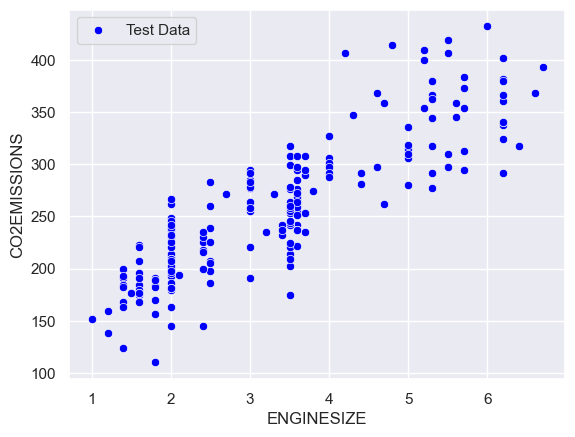

In [15]:
sns.set(style = 'darkgrid')

ax = sns.scatterplot(x = X_test['ENGINESIZE'], y = y_test, color = 'blue', label = 'Test Data')

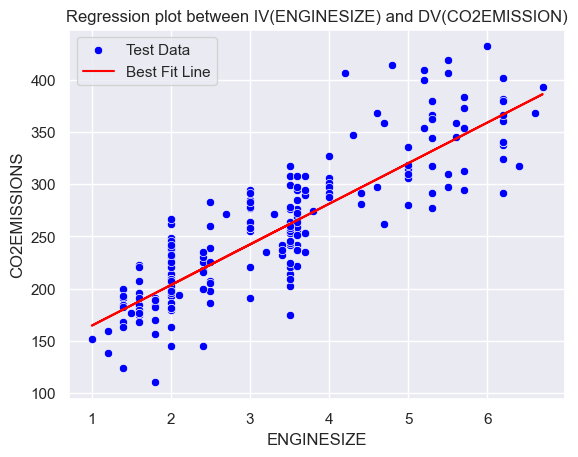

In [16]:
sns.set(style = 'darkgrid')

ax = sns.scatterplot(x = X_test['ENGINESIZE'], y = y_test, color = 'blue', label = 'Test Data')
ax.plot(X_test, y_pred, color='red', label = "Best Fit Line")    #.plot =>line plot
plt.title("Regression plot between IV(ENGINESIZE) and DV(CO2EMISSION)")
plt.legend()

## Plotting equation in scatter plot

### y = mx + c (m => coef_, c => intercept_)

In [17]:
l_reg.coef_      # getting co-efficient values

array([38.91706532])

In [18]:
l_reg.coef_[0]

38.9170653192542

In [19]:
l_reg.intercept_     # getting intercept values

125.53071554827616

In [20]:
m = l_reg.coef_[0]
c = l_reg.intercept_

In [21]:
equation = f'{m}X+{c}'
print(equation)

38.9170653192542X+125.53071554827616


In [22]:
equation = f'y = {m:.2f}*X + {c:.2f}'
print(equation)

y = 38.92*X + 125.53


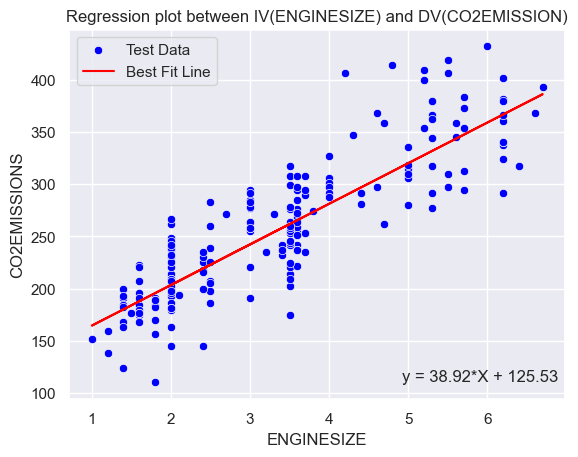

In [23]:
sns.set(style = 'darkgrid')

ax = sns.scatterplot(x = X_test['ENGINESIZE'], y = y_test, color = 'blue', label = 'Test Data')
ax.plot(X_test, y_pred, color='red', label = "Best Fit Line")
plt.annotate(equation, xy=(0.67,0.05), xycoords = 'axes fraction')   # to plot the equation
plt.title("Regression plot between IV(ENGINESIZE) and DV(CO2EMISSION)")
plt.legend()